In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from collections import Counter
from matplotlib import pyplot

In [2]:
# Read in processed data
df = pd.read_csv('./datasets/credit.csv')

In [3]:
# Preview data
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Delinquent Time,Credit Score Range
0,0.081528,0.594985,1.0,0.004342,1.0,0.746988,0.006592,0.8,0.333333,0.333333,0.011965,0.202096,0.066667,0.066667,0.006940,0.000271,0.142857,0.0,0.000000,"(701.2, 717.8]"
1,0.309318,0.371466,1.0,1.000000,1.0,0.939759,0.013024,0.8,0.666667,0.200000,0.066998,0.167665,0.226667,0.066667,0.009063,0.000487,0.000000,0.0,0.666667,"(734.4, 751.0]"
2,0.467122,0.903985,1.0,0.003365,0.0,0.819277,0.004413,0.3,0.666667,0.200000,0.020057,0.124251,0.106667,0.000000,0.007796,0.000251,0.000000,0.0,0.000000,"(717.8, 734.4]"
3,0.539748,0.312567,0.0,0.001954,1.0,0.867470,0.004957,1.0,0.333333,0.200000,0.037554,0.203593,0.066667,0.000000,0.006549,0.000177,0.000000,0.0,0.000000,"(717.8, 734.4]"
4,0.153657,0.565583,1.0,0.002064,1.0,0.873494,0.006693,0.0,0.333333,0.200000,0.024906,0.238024,0.160000,0.066667,0.003716,0.000177,0.142857,0.0,0.333333,"(717.8, 734.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88860,0.635777,0.429482,1.0,0.004314,1.0,0.927711,0.008776,0.7,0.333333,0.200000,0.044728,0.194611,0.133333,0.000000,0.012751,0.000427,0.000000,0.0,1.000000,"(734.4, 751.0]"
88861,0.769598,0.558257,1.0,0.001466,1.0,0.879518,0.008688,0.6,1.000000,0.200000,0.011003,0.131737,0.106667,0.000000,0.002648,0.000152,0.000000,0.0,0.000000,"(717.8, 734.4]"
88862,0.734902,0.423828,1.0,0.001213,1.0,0.801205,0.004149,0.4,0.333333,0.200000,0.028455,0.092814,0.093333,0.000000,0.002260,0.000214,0.000000,0.0,0.333333,"(717.8, 734.4]"
88863,0.050081,0.972796,1.0,1.000000,1.0,0.819277,0.005411,1.0,0.333333,0.200000,0.028066,0.196108,0.093333,0.066667,0.005626,0.000156,0.000000,0.0,0.333333,"(717.8, 734.4]"


#### Oversample imbalanced dataset for classification

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[["Credit Score Range"]] = df[["Credit Score Range"]].apply(le.fit_transform)

In [5]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
labels = df["Credit Score Range"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 66648 observation with 18 features
test data has 22217 observation with 18 features


In [7]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

Class=0, n=21258 (10.000%)
Class=1, n=21258 (10.000%)
Class=2, n=21258 (10.000%)
Class=3, n=21258 (10.000%)
Class=4, n=21258 (10.000%)
Class=5, n=21258 (10.000%)
Class=6, n=21258 (10.000%)
Class=7, n=21258 (10.000%)
Class=8, n=21258 (10.000%)
Class=9, n=21258 (10.000%)


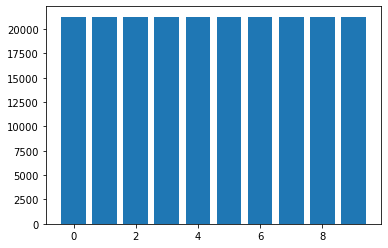

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

counted_target = Counter(y_resampled)
for Range, rangeAmount in sorted(counted_target.items()):
    percentage = rangeAmount / len(y_resampled) * 100
    print('Class=%d, n=%d (%.3f%%)' % (Range, rangeAmount, percentage))
# plot the distribution
pyplot.bar(counted_target.keys(), counted_target.values())
pyplot.show()

### Linear Model

In [4]:
X = df['Term']
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

LR_model = LinearRegression()
LR_model.fit(X_train.values.reshape(-1,1), y_train)
y_pred_train = LR_model.predict(X_train.values.reshape(-1,1))
y_pred = LR_model.predict(X_test.values.reshape(-1,1))

print('MSE for training set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred), '\n')

print('R2 score for training set: ', r2_score(y_train, y_pred_train))
print('R2 score for testing set: ', r2_score(y_test, y_pred))

MSE for training set:  0.02254913664249281
MSE for testing set:  0.022407034588306195 

R2 score for training set:  0.2127291852646116
R2 score for testing set:  0.22114830902103266


### Polynomial Model

In [5]:
X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score', 'Credit Score Range'])
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

poly = PolynomialFeatures(degree=2)
X_deg = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_deg, y, test_size=0.3, random_state=1)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_pred_train = poly_model.predict(X_train)
y_pred = poly_model.predict(X_test)

print('MSE for training set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred), '\n')

print('R2 score for training set: ', r2_score(y_train, y_pred_train))
print('R2 score for testing set: ', r2_score(y_test, y_pred))

MSE for training set:  0.020015724497915253
MSE for testing set:  0.07023342530886657 

R2 score for training set:  0.3011796423594342
R2 score for testing set:  -1.4412611070633758


### Support Vector Regression

In [6]:
X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score', 'Credit Score Range', 'Months since last delinquent'])
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('MSE for training set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred),'\n')

print('R2 score for training set: ', r2_score(y_train, y_pred_train))
print('R2 score for testing set: ', r2_score(y_test, y_pred))

MSE for training set:  0.02072959867346114
MSE for testing set:  0.02084024219386768 

R2 score for training set:  0.2762557478125591
R2 score for testing set:  0.2756088357369719


### Support Vector Classification

### Logistic Regression

In [7]:
X = df.drop(columns=['Loan ID', 'Customer ID', 'Credit Score', 'Credit Score Range'])
y = df['Credit Score Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('Classification report for training set:\n', classification_report(y_train, y_pred_train), '\n')
print('Classification report for testing set:\n', classification_report(y_test, y_pred))

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for training set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      0.00       180
  (601.6, 618.2]       0.00      0.00      0.00       321
  (618.2, 634.8]       0.00      0.00      0.00       495
  (634.8, 651.4]       0.00      0.00      0.00      1033
  (651.4, 668.0]       0.10      0.00      0.00      2041
  (668.0, 684.6]       0.15      0.00      0.00      3346
  (684.6, 701.2]       0.16      0.03      0.05      6156
  (701.2, 717.8]       0.26      0.05      0.09     11068
  (717.8, 734.4]       0.27      0.35      0.30     15171
  (734.4, 751.0]       0.45      0.84      0.59     18891

        accuracy                           0.38     58702
       macro avg       0.14      0.13      0.10     58702
    weighted avg       0.29      0.38      0.29     58702
 

Classification report for testing set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      

### Neural Network

In [8]:
df_ohe = pd.get_dummies(df)
df_ohe

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,"Credit Score Range_(584.834, 601.6]","Credit Score Range_(601.6, 618.2]","Credit Score Range_(618.2, 634.8]","Credit Score Range_(634.8, 651.4]","Credit Score Range_(651.4, 668.0]","Credit Score Range_(668.0, 684.6]","Credit Score Range_(684.6, 701.2]","Credit Score Range_(701.2, 717.8]","Credit Score Range_(717.8, 734.4]","Credit Score Range_(734.4, 751.0]"
0,0.081780,0.595049,1.0,0.004342,1.0,0.746988,0.029970,0.8,0.333333,0.333333,...,0,0,0,0,0,0,0,1,0,0
1,0.309687,0.371241,1.0,1.000000,1.0,0.939759,0.059213,0.8,0.666667,0.200000,...,0,0,0,0,0,0,0,0,0,1
2,0.467604,0.903503,1.0,0.003365,0.0,0.819277,0.020064,0.3,0.666667,0.200000,...,0,0,0,0,0,0,0,0,1,0
3,0.153952,0.565467,1.0,0.002064,1.0,0.873494,0.030429,0.0,0.333333,0.200000,...,0,0,0,0,0,0,0,0,1,0
4,0.544380,0.686408,1.0,0.005376,1.0,0.560241,0.068202,0.2,1.000000,0.200000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83856,0.635828,0.429335,1.0,0.004314,1.0,0.927711,0.039901,0.7,0.333333,0.200000,...,0,0,0,0,0,0,0,0,0,1
83857,0.769391,0.558161,1.0,0.001466,1.0,0.879518,0.039500,0.6,1.000000,0.200000,...,0,0,0,0,0,0,0,0,1,0
83858,0.734715,0.423648,1.0,0.001213,1.0,0.801205,0.018862,0.4,0.333333,0.200000,...,0,0,0,0,0,0,0,0,1,0
83859,0.050030,0.972334,1.0,1.000000,1.0,0.819277,0.024602,1.0,0.333333,0.200000,...,0,0,0,0,0,0,0,0,1,0


### Random Forest

#### Random Forest regressor

In [14]:
# plot the hyper-parameter tuning
def class_plot(grid, grid_param, title):
    scores = [x for x in grid.cv_results_['mean_test_score']]
    m_depth = grid_param['max_depth']
    n_est = grid_param['n_estimators']
    #given a new shape of max_depth array into length of n estimators array without changing the data
    scores = np.array(scores).reshape(len(m_depth), len(n_est))
    fig = plt.figure()
    ax = plt.subplot(111)
    for ind, i in enumerate(m_depth):
        plt.plot(n_est, scores[ind], '-o', label='Max depth' + str(i),)
    ax.legend(loc='lower right') #, bbox_to_anchor=(1, 0.5))
    plt.xlabel('n estimator')
    plt.ylabel('Mean score')
    plt.title(title)
    plt.show()
    

# get the raw features importance (aggregate all dummies)
def raw_feature_importance(importance_dataframe, num_pos, cate_list):
    # numercial feature importance
    num_importance = importance_dataframe.head(num_pos) 
    num_importance.reset_index(drop = True, inplace = True)

    cate_dict ={}
    for i in cate_list:
        summ = 0
        for (idx, row) in importance_dataframe.iterrows():
            if i in row.loc['Feature']:
                summ += row.loc['Importance']
        cate_dict[i] = summ 
    
    cate_importance = pd.DataFrame.from_dict(cate_dict, orient='index')
    cate_importance.rename(columns={0: 'Importance'}, inplace=True)
    cate_importance.reset_index(inplace = True)
    cate_importance.rename(index=str, columns={"index": "Feature"}, inplace = True)

    raw_feature_importances = pd.concat([num_importance, cate_importance])
    raw_feature_importances.sort_values(by=['Importance'], inplace = True, ascending=False)
    return raw_feature_importances

# feature importance
def plot_feature_importance(rank_importance,left_limit, color, alpha, size_L, size_H, title):
    fig, ax = plt.subplots(1,1) 
    ax.bar(range(len(rank_importance['Feature'][0:left_limit])),rank_importance[0:left_limit]['Importance'],color=color,alpha=alpha)
    ax.set_xticks(range(rank_importance[0:left_limit].shape[0]))
    ax.set_xticklabels(rank_importance[0:left_limit]['Feature'], rotation='vertical', fontsize=12)    
    ax.set_xlabel('Features', fontsize = 16)
    ax.set_ylabel('Feature importance', fontsize = 16)
    ax.set_title(title, fontsize = 16)
    fig.set_size_inches(size_L, size_H)
    plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
grid_1 = {'n_estimators': [2, 5,10,15],
          'max_depth': [30,40,45, 50]}

rf = RandomForestRegressor(random_state=1, verbose=1,n_jobs =6)
#The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
grid_rf = GridSearchCV(rf, grid_1, cv=3)
grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_jobs=6, random_state=1,
                                             verbose=1),
             param_grid={'max_depth': [30, 40, 45, 50],
                         'n_estimators': [2, 5, 10, 15]})

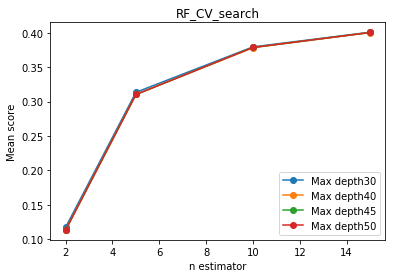

In [18]:
import matplotlib.pyplot as plt
class_plot(grid_rf, grid_1, 'RF_CV_search')

In [19]:
print (grid_rf.best_params_)
print (grid_rf.best_score_)

{'max_depth': 30, 'n_estimators': 15}
0.40062378722281666


In [20]:
# re-train the model with full training set
rf_best = grid_rf.best_estimator_
rf_best.fit(X_train, y_train)
pred_rf_test = rf_best.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    5.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


In [21]:
rf_best.score(X_test, y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


0.44277060973423465

#### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
classifier_RF = RandomForestClassifier()
cv_score = model_selection.cross_val_score(classifier_RF, X_resampled, y_resampled, cv=5)
print(cv_score)
print('Model accuracy of Random Forest Classfier' + ' is ' + str(cv_score.mean()))

[0.89895569 0.89820303 0.90467118 0.92703923 0.96455452]
Model accuracy of Random Forest Classfier is 0.9186847304544171


In [26]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [27]:
#find optimal hyperparameters of Random forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [28]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9180543795277071
Best parameters set:
n_estimators:80


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
best_RF_model = Grid_RF.best_estimator_
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()
# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [30]:
confusion_matrices = [ ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test)))]
draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 1.0
precision is: 1.0
recall is: 1.0

